In [ ]:
import numpy as np
import pandas as pd

# Data Visualization
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt

# Data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Clustering Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
cd /gdrive/MyDrive/Colab Notebooks/

/gdrive/MyDrive/Colab Notebooks


In [ ]:
df = pd.read_csv("Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [ ]:
# define the categorical columns.
categorical_columns = ['Gender', 'Profession']

# define the remarkable columns.
numerical_columns = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']

# Convert or categorical columns to numerical columns.
for cat_col in categorical_columns:

    # Initialise label encoder.
    encoder = LabelEncoder()

    # Apply transformation.
    df[cat_col] = encoder.fit_transform(df[cat_col])

In [ ]:
#Performing feature scaling using a standard scaler
scaler = StandardScaler()

# Rescaled data.
df.drop(columns=['CustomerID'], inplace=True)
full_data = scaler.fit_transform(df)

In [ ]:
full_data[:5]

array([[ 1.20706357, -1.05408932, -2.09350095, -0.42833854,  0.77835593,
        -0.79120713,  0.11749744],
       [ 1.20706357, -0.98372287, -1.65613312,  1.07554599, -0.35434734,
        -0.28116224, -0.39005088],
       [-0.82845678, -1.0189061 , -0.54084515, -1.6099621 , -0.35434734,
        -0.79120713, -1.40514752],
       [-0.82845678, -0.91335643, -1.13129172,  0.93231889,  1.53349144,
        -1.04622958, -0.8975992 ],
       [-0.82845678, -0.63189066, -1.59052794, -0.39253176,  0.02322042,
        -0.53618469,  1.13259408]])

In [ ]:
#Using PCA to reduce the dimensions of data for visualization purpose

# Instantiate a PCA object with 3 components for 3D data
pca_3D = PCA(n_components=3, random_state=42)

# Fit and transform the data to obtain the 3D projection
data_3D = pca_3D.fit_transform(full_data)

In [ ]:
#Applying the elbow method for calculating the best fit for number of centroids
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++' , random_state=42)

  # Fit the KMeans model on train_ds
  kmeans.fit(data_3D)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

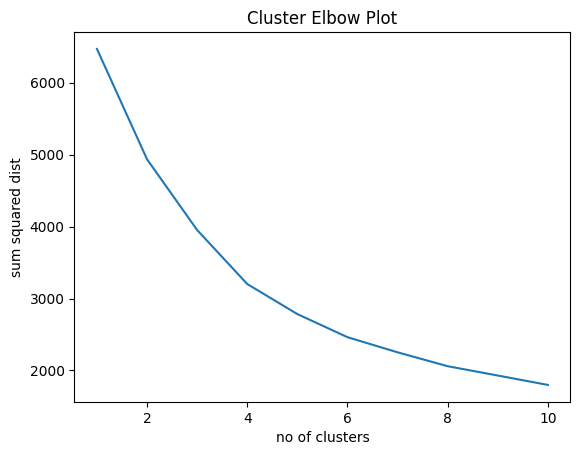

In [ ]:
#plotting the elbow curve
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(ks, wcss)

# Add labels and title
plt.xlabel('no of clusters')
plt.ylabel('sum squared dist')
plt.title('Cluster Elbow Plot')

# Show the plot
plt.show()

In [ ]:
#from the above elbow curve we see 4 clusters perform best
kmeans = KMeans(n_clusters=4, init='k-means++' , random_state=42)

# Fit the KMeans model on train_ds
kmeans.fit(data_3D)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#Visualization of the clustering
# Create the 3D scatter plot
fig = px.scatter_3d(
    x=data_3D[:, 0], y=data_3D[:, 1], z=data_3D[:, 2],
    color=labels,
    size_max=5,
    opacity=0.8,
    labels={'x':'X', 'y':'Y', 'z':'Z'},
    color_continuous_scale=['black', 'cyan' , 'red' , 'green'])

# Add a trace for the cluster centers
fig.add_trace(
    go.Scatter3d(
        x=centroids[:,0],
        y=centroids[:,1],
        z=centroids[:,2],
        mode='markers+text'
    )
)

# Update the layout
fig.update_layout(
    coloraxis_showscale=False,
    title='K Means Clustering Visualization'
)

# Show the plot
fig.show()